   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0      

C:\Users\manik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


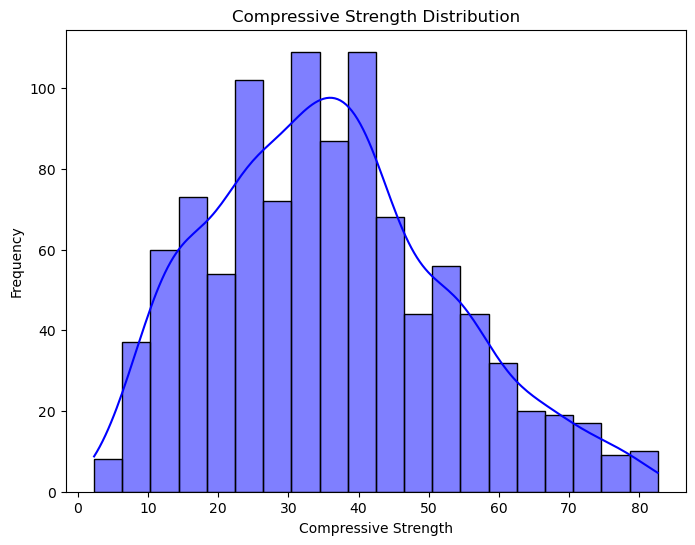

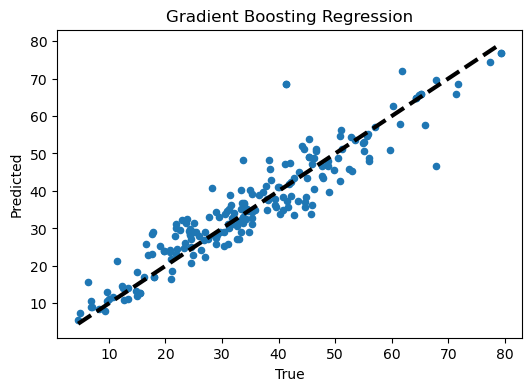

In [1]:
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
data = pd.read_excel("C:/Users/manik/OneDrive/Desktop/IMI/Concrete_Data.xls")
 
print(data.head()) #printing file 5rows and 9columns

print(len(data)) # printing length of the file

print(data.shape) # shape of the file

# Data preprocessing
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer", "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
mapper = {col: req_col_names[i] for i, col in enumerate(data.columns)}
data = data.rename(columns=mapper)

# Train-test split
X = data.iloc[:, :-1]   
y = data.iloc[:, -1]          
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Standardize the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Gradient Boosting Regression
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

# Predictions
y_pred_gbr = gbr.predict(x_test)

# Evaluation
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)


print("\nGradient Boosting Regression (GBR) Results:")
print("RMSE:", rmse_gbr)
print("MSE:", mse_gbr)
print("MAE:", mae_gbr)
print("R2 Score:", r2_gbr)

# Plotting Compressive Strength Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['CC_Strength'], kde=True, color='blue', bins=20)
plt.title('Compressive Strength Distribution')
plt.xlabel('Compressive Strength')
plt.ylabel('Frequency')
plt.show()

# create scatter plot for gradient boosting regression
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_gbr, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Gradient Boosting Regression')
plt.show()